## Implementing Decision Tree Classifier on Iris Dataset

### Task provided by the Spark Foundation throurgh GRIP Program

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv("iris.csv", na_values=' NaN')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum().sum()

0

### Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df['Species'] = le.fit_transform(df['Species'])

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Data Visualisation

<AxesSubplot:>

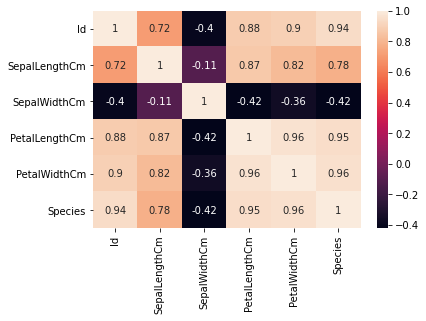

In [8]:
sns.heatmap(df.corr(),annot=True)

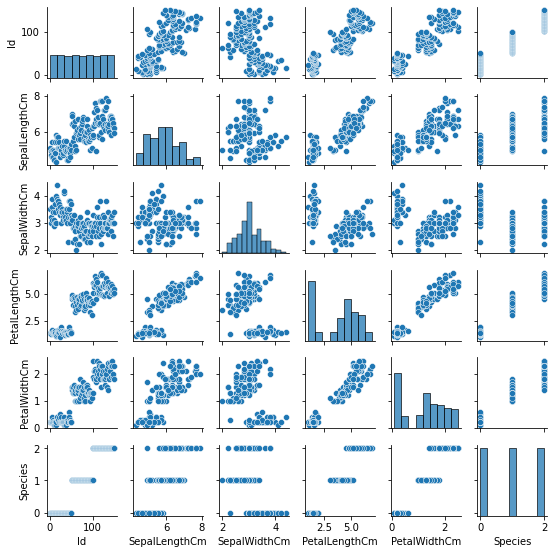

In [9]:
sns.pairplot(df, height=1.3)
plt.tight_layout()
plt.show()

### Data Spliting

In [10]:
data = df.drop(columns=['Species', 'Id'])
target = df['Species']

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.2)

### Data Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

### Model Building

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(xtrain_sc, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
pred_train = dt.predict(xtrain_sc)

In [17]:
print("Training Dataset")
print("accuracy score: ", accuracy_score(pred_train, ytrain))
print("mean squared error:", mean_squared_error(pred_train, ytrain))
print("R2 Score: ", r2_score(pred_train, ytrain))
print("confusion matrix: \n", confusion_matrix(pred_train,ytrain))

Training Dataset
accuracy score:  1.0
mean squared error: 0.0
R2 Score:  1.0
confusion matrix: 
 [[35  0  0]
 [ 0 45  0]
 [ 0  0 40]]


In [18]:
pred_test = dt.predict(xtest_sc)

In [19]:
print("Testing Dataset")
print("accuracy score: ", accuracy_score(pred_test, ytest))
print("mean squared error:", mean_squared_error(pred_test, ytest))
print("R2 Score: ", r2_score(pred_test, ytest))
print("confusion matrix: \n", confusion_matrix(pred_test,ytest))

Testing Dataset
accuracy score:  0.9666666666666667
mean squared error: 0.03333333333333333
R2 Score:  0.956140350877193
confusion matrix: 
 [[15  0  0]
 [ 0  5  1]
 [ 0  0  9]]


#### Now the model is ready and we can feed new data and the classifier will be able to predict the right class accordingly.